In [10]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import os
from itertools import groupby

In [2]:
base = 'data'
data_files = os.listdir(base)

In [3]:
file = os.path.join(base, data_files[0])

In [4]:
results = h5py.File(file, 'r')

In [5]:
times = results['t'].value.ravel()
cursor_pos_x, cursor_pos_y = results['cursor_pos'].value
target_pos_x, target_pos_y = results['target_pos'].value
unique_targets = np.unique(results['target_pos'].value, axis=1)

In [15]:
for idx, (target_x, target_group) in enumerate(groupby(target_pos_x)):
    print(list(target_group))

[-104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375, -104.375,

In [10]:
trials = {}
trial_idx = 0
cur_idx = 0 
for (target_x, target_group) in groupby(target_pos_x):
    n_timestamps = len(list(target_group))
    bounds = (cur_idx, cur_idx + n_timestamps + 1)
    if n_timestamps > 1:
        trial = {}
        if trial_idx == 0:
            trial['target_old'] = (target_x, target_pos_y[cur_idx])
        else:
            trial['target_old'] = trials[trial_idx - 1]['target_new']
        trial['timestamps'] = times[bounds[0]:bounds[1]]
        trial['target_new'] = (target_x, target_pos_y[cur_idx])
        trial['cursor_pos_x'] = cursor_pos_x[bounds[0]:bounds[1]]
        trial['cursor_pos_y'] = cursor_pos_y[bounds[0]:bounds[1]]
        trials[trial_idx] = trial
        trial_idx += 1
    cur_idx += n_timestamps + 1

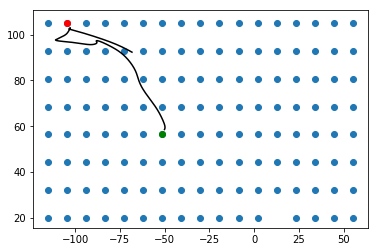

In [53]:
trial_idx = 92
plt.scatter(unique_targets[0], unique_targets[1])
plt.scatter(trials[trial_idx]['target_old'][0], trials[trial_idx]['target_old'][1], color='g')
plt.scatter(trials[trial_idx]['target_new'][0], trials[trial_idx]['target_new'][1], color='r')
plt.plot(trials[trial_idx]['cursor_pos_x'], trials[trial_idx]['cursor_pos_y'], color='k')